### Preparing the data

In [141]:
# import some librairies
import nltk
import pandas as pd
import numpy as np


#nltk.download('punkt')
#nltk.download('stopwords')

We can load the dataset with two ways : 'with open' or Pandas library. By default we keep the Pandas method.

In [142]:
# with open
'''
import csv
with open('SMSSpamCollection.txt', newline='',encoding='utf-8') as f:
    text = csv.reader(f, delimiter='\t')
    corpus=[]
    targets=[]
    for elt in text:
        targets.append(elt[0])
        corpus.append(elt[1])
'''    


# with pandas
data=pd.read_csv('SMSSpamCollection.txt',sep='\t', header=None)

# Define the corpus and the targets
corpus=np.array(data[1])
targets=np.array(data[0])

print('The length of corpus is '+str(len(corpus)))
print('The length of targets is '+str(len(targets)))

The length of corpus is 5572
The length of targets is 5572


In [143]:
print(targets)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [144]:
print(corpus)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


#### Removing the stop words

Before processing with our data, we need to remove the stop words which are common word that appear to provide little or no value to the natural language processing.

In [145]:
# Define the stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'for', 'y', 'some', 'over', 'she', 'all', 'further', "she's", 'should', "hadn't", 'am', 'where', 'in', "couldn't", 'now', 'an', 'i', 'wouldn', 'my', 'the', 'then', 'won', "shouldn't", 'only', "shan't", 'more', 'each', 'himself', "mustn't", 'no', 'themselves', 'there', 'him', 'if', 'her', 'are', 'between', 'those', 'have', "won't", "wouldn't", 'as', 'why', 'isn', 'and', 'under', 'few', 'against', 'other', "isn't", 'ourselves', "aren't", 'its', 'had', 'below', 'didn', 'mustn', 'with', 'their', 're', 'that', 'being', 've', 'shan', 'too', 'we', 'both', 'into', 'he', "needn't", 'weren', 'don', 'your', 'doesn', 'me', 'until', "you'd", 'how', 'd', 'theirs', 'before', 'during', 'is', 'after', 'herself', 'did', 'this', 't', "don't", 'couldn', 'any', 'can', 'hadn', "you'll", 'by', 'were', "hasn't", 'most', 'hasn', 'haven', 'than', 'you', 'ma', 'once', 'about', 'it', 'a', "you're", "mightn't", 'up', 'm', 'does', "you've", 'ours', 'such', 'has', 'own', 'his', 'who', 'them', 'mightn', 'or', 'mysel

### Vectorizing the data with CountVectorizer

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words)
vector = vectorizer.fit_transform(corpus)

In [147]:
# Get a list of all the words present in our corpus
print(vectorizer.get_feature_names())

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [148]:
# Print the vector
vector

<5572x8577 sparse matrix of type '<class 'numpy.int64'>'
	with 47370 stored elements in Compressed Sparse Row format>

In [149]:
# For exemple what is the index of the word 'go' in the vector dictionary
print(vectorizer.vocabulary_.get('go'))
print(vectorizer.get_feature_names()[3531])

3531
go


In [150]:
# Create a function showing the counting of words
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [151]:
freq_top=get_top_n_words(corpus, n=None)

In [152]:
# From this function we create a Pandas dataframe
df = pd.DataFrame(freq_top, columns =['Word','Number of times'])

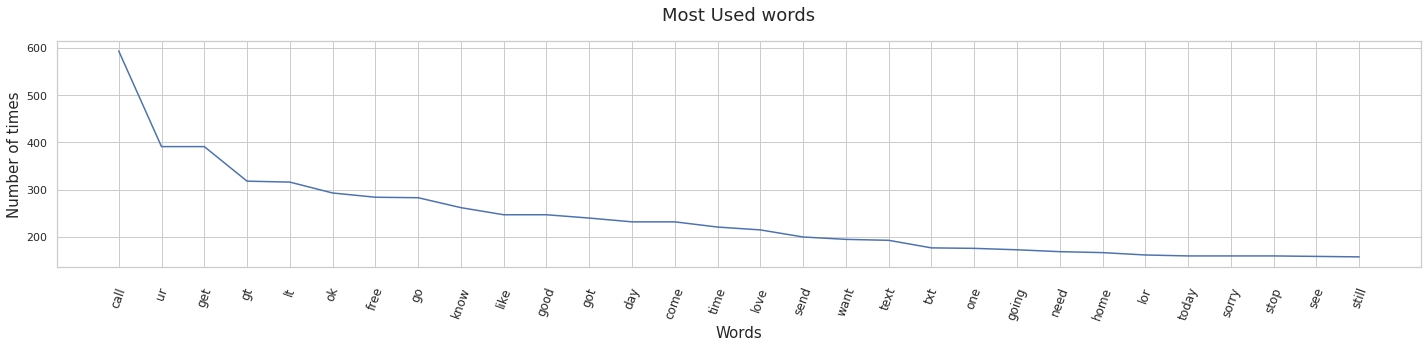

In [153]:
# Let's see the plot distribution
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']

y_nbr = df['Number of times'].iloc[:30]
x_word = df['Word'].iloc[:30]
fig, ax = plt.subplots(figsize=(20, 5),tight_layout=True)
ax.set_title('Most Used words',size=18,pad=20)
ax.set_xlabel('Words',size=15)
ax.set_ylabel('Number of times',size=15)
ax.plot(x_word, y_nbr)
ax.tick_params(axis='x',labelsize=12,pad=8,size=10, rotation=70)
plt.show()

In [154]:
# What are the 10 most common words ?
df.head(10)

,Word,Number of times
0,call,593
1,ur,391
2,get,391
3,gt,318
4,lt,316
5,ok,293
6,free,284
7,go,283
8,know,262
9,like,247


In [155]:
# What are the 10 least common words ?
df.tail(10)

,Word,Number of times
8567,nmde,1
8568,dump,1
8569,heap,1
8570,lowes,1
8571,salesman,1
8572,087187272008,1
8573,now1,1
8574,pity,1
8575,suggestions,1
8576,bitching,1


<AxesSubplot:xlabel='Word'>

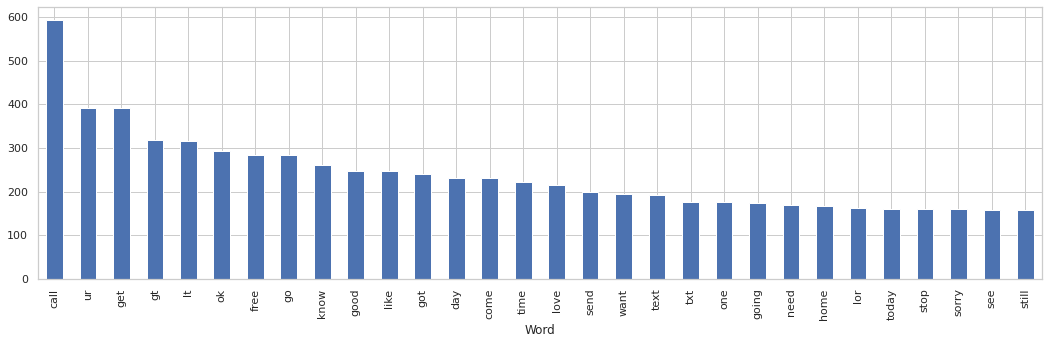

In [156]:
# Display the 30 most common words
df.groupby('Word')['Number of times'].sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize = (18,5))

### Vectorizing the data with TfidVectorizer

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer_tf = TfidfVectorizer(stop_words=stop_words)
# tokenize and build vocab
vectorizer_tf.fit(corpus)
# summarize
print(vectorizer_tf.idf_)
# encode document
vector_tf = vectorizer_tf.transform(corpus)
# summarize encoded vector
print(vector_tf.shape)

[7.22779351 6.29348428 8.93254161 ... 8.93254161 8.93254161 8.93254161]
(5572, 8577)


### Classification with CountVectorizer

#### With Logistic Regression

In [158]:
X=vectorizer.fit_transform(corpus)
Y=[1 if x=="ham" else 0 for x in targets]

In [159]:
# Build train and test datasets for class classification

from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,random_state=42)

rtrain = X_train.shape[0]/ X.shape[0]
rtest = X_test.shape[0] / X.shape[0]
print("train size ratio: %.3f : %d" % (rtrain, X_train.shape[0]))
print("test size ratio: %.3f : %d" % (rtest, X_test.shape[0]))

train size ratio: 0.800 : 4457
test size ratio: 0.200 : 1115


In [160]:
from sklearn.linear_model import LogisticRegression
# import the class
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
results=logreg.fit(X_train ,y_train)

# make a prediction
y_pred=logreg.predict(X_test)

In [161]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[133,  16],
       [  0, 966]])

In [162]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9856502242152466
Precision: 0.9837067209775967
Recall: 1.0


About the f1 score : 

It can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

f1 = 2 * (precision * recall) / (precision + recall)
We can use the classification report to get this score

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[133  16]
 [  0 966]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

0.9856502242152466


#### With SVM

In [164]:
# Importing SVM
from sklearn import svm

# Creating SVM model

clf = svm.SVC()
# Fit the model to the dataset
results_clf=clf.fit(X_train, y_train)

# Model prediction
y_pred_svm = clf.predict(X_test)

In [165]:
# Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.9838565022421525
Precision: 0.9817073170731707
Recall: 1.0


In [166]:
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))

[[131  18]
 [  0 966]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9838565022421525


#### With Random Forest Classifier

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
results_rf=rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

In [168]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

[[126  23]
 [  0 966]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

0.979372197309417


#### With Cross-Validation and ShuffleSplit

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


In [170]:
cv_scores_f1=cross_val_score(logreg, X, Y, cv=cv,scoring='f1_macro')
cv_scores_f1

array([0.96752443, 0.95401163, 0.96506552, 0.97269674, 0.96671294])

In [171]:
# Calculate the mean of f1 scores
print(np.mean(cv_scores_f1))
# Calculate the standard deviation of f1 scores
print(np.std(cv_scores_f1))

0.9652022530652495
0.006149646144312544
